# Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Loading Dataset:

In [2]:
path = './Datasets/Train.csv'
big_mart_data = pd.read_csv(path)

In [3]:
# First 5 rows

big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Number of datapoints and features

rows, columns = big_mart_data.shape
print("Total number of datapoints are:", rows)
print("Total number of features are:", columns)

Total number of datapoints are: 8523
Total number of features are: 12


In [5]:
# Getting some information about the dataset

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Types of features in our datasets:

<ol>
    <li>
    Catgorical Features:
    <ul>
        <li> Item_Identifier </li>
        <li> Item_Fat_Content </li>
        <li> Item_Type </li>
        <li> Outlet_Identifier </li>
        <li> Outlet_Size </li>
        <li> Outlet_Location_Type </li>
        <li> Outlet_Type </li>
        </ul> 
    </li> <br />
    <li>
    Numerical Features:
    <ul>
        <li> Item_Weight  </li>
        <li> Item_Visibility </li>
        <li> Item_MRP </li>
        <li> Outlet_Identifier </li>
        <li> Outlet_Establishment_Year </li>
        <li> Item_Outlet_Sales </li>
        </ul> 
    </li>
</ol>

In [6]:
# Checking for missing values:

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values:

We have 2 features with missing values, Item_Weight and Outlet_Size.

To handle these values, we can replace numerical values with the mean of that features and categorical values with mode

In [7]:
# Calculating mean of the Item_weight Feature:

item_weight_mean = np.mean(big_mart_data['Item_Weight'])
big_mart_data['Item_Weight'].replace(np.nan, item_weight_mean, inplace=True)

In [8]:
big_mart_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
missing_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()))
missing_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
# Let us look for missing values in different type of Outlet Type

outlet_type = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

for i in outlet_type:
    print(f'The total number of missing values for Outlet type {i} is:', end= ' ')
    print(big_mart_data[big_mart_data['Outlet_Type'] == i]['Outlet_Size'].isna().sum())

The total number of missing values for Outlet type Grocery Store is: 555
The total number of missing values for Outlet type Supermarket Type1 is: 1855
The total number of missing values for Outlet type Supermarket Type2 is: 0
The total number of missing values for Outlet type Supermarket Type3 is: 0


In [11]:
# Replacing all the missing values of Outlet Size each for Outlet Type

missing_values = big_mart_data['Outlet_Size'].isnull()

big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(
    lambda x: missing_outlet_size[x])

In [12]:
# Check for missing values

big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### We can see there are no more missing values

# Data Analysis:

In [13]:
# Statistical Data about the dataset

big_mart_data.describe() # Shows only for numerical features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Visualisation about the Numerical Column:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


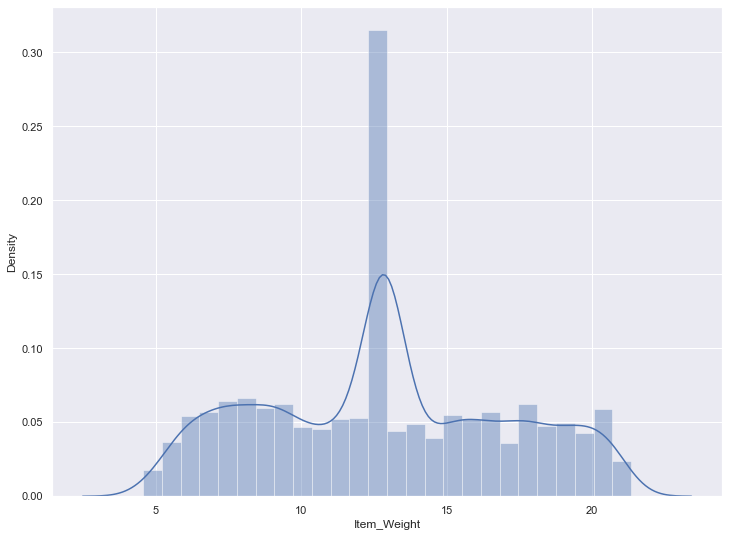

In [14]:
# Let us look at Item Weight

sns.set()

plt.figure(figsize=(12, 9))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


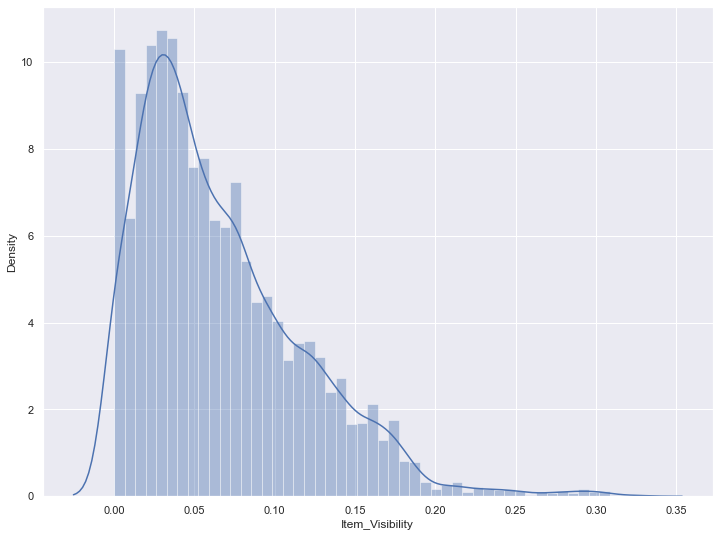

In [15]:
# Let us look at Item Visibility

plt.figure(figsize=(12, 9))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


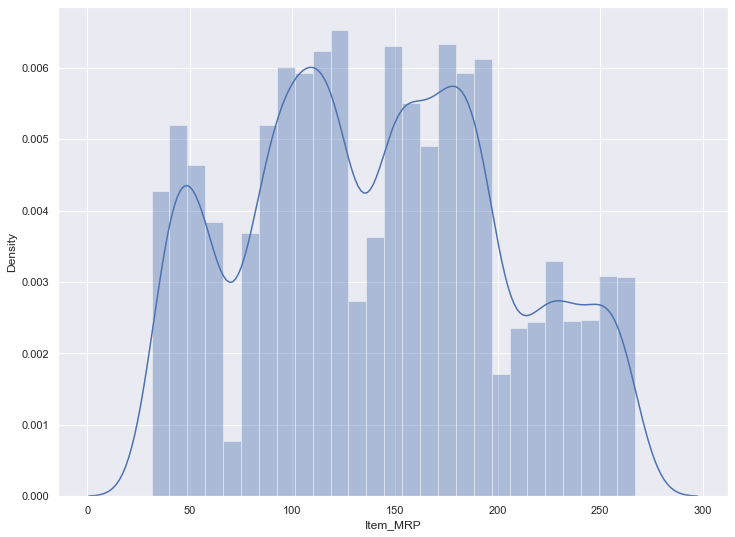

In [16]:
# Let us look at Item MRP

plt.figure(figsize=(12, 9))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


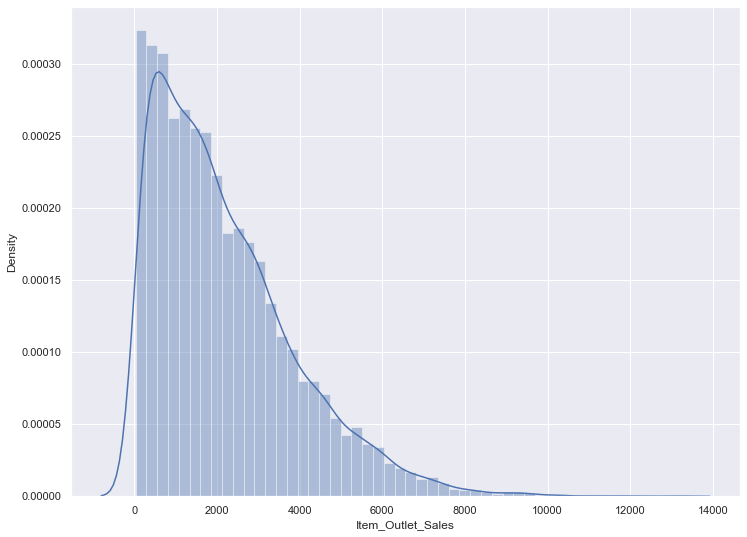

In [17]:
# Let us look at Item Outlet Sales

plt.figure(figsize=(12, 9))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


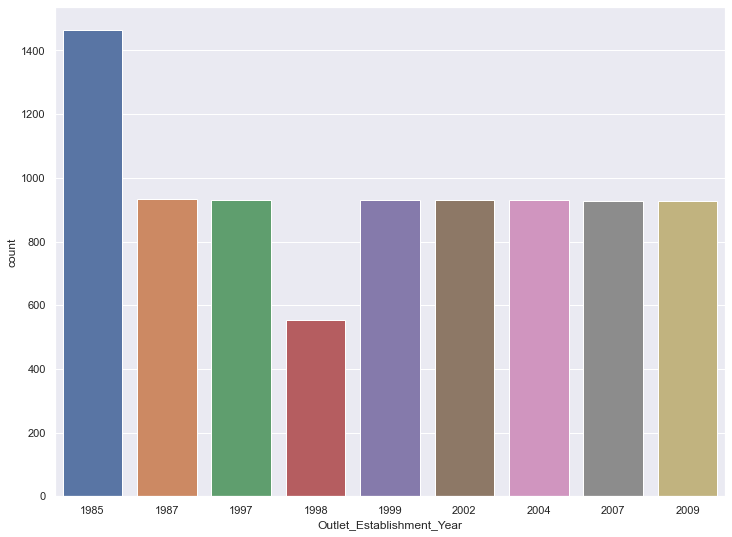

In [18]:
# Let us look at Outlet Establishment Year

plt.figure(figsize=(12, 9))
sns.countplot(big_mart_data['Outlet_Establishment_Year'])
plt.show()

# Visualisation about Categorical Columns:

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


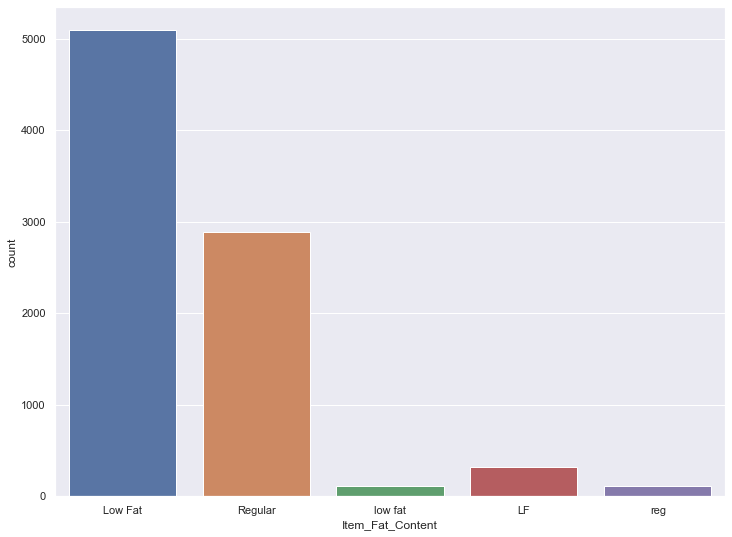

In [19]:
# Let us look at Item Fat Content

plt.figure(figsize=(12, 9))
sns.countplot(big_mart_data['Item_Fat_Content'])
plt.show()

We can see that there are irregularities in our data that we need to clean.

In [20]:
# Cleaning the irregular values in Item_Fat_Content

big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
big_mart_data['Item_Fat_Content'].replace({'LF': 'Low Fat' ,
                                          'reg': 'Regular',
                                          'low fat' : 'Low Fat'}, inplace=True)
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


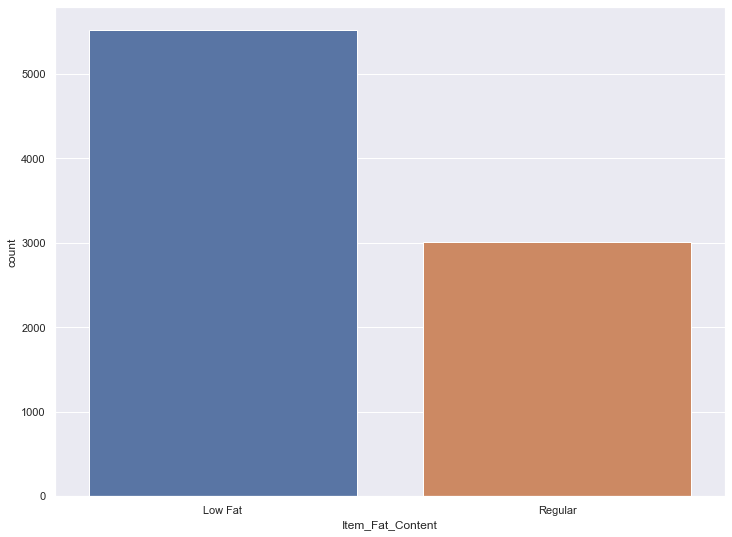

In [22]:
# Let us look at Item Fat Content plot again

plt.figure(figsize=(12, 9))
sns.countplot(big_mart_data['Item_Fat_Content'])
plt.show()

 We can see that we clean the data and have a clearer comparision between the two values.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


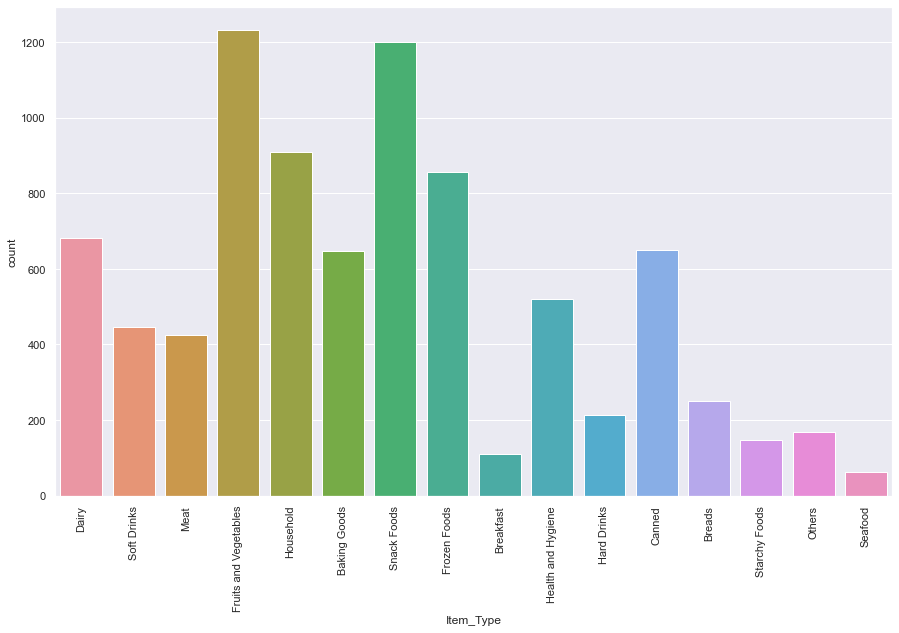

In [23]:
# Let us look at Item Type

plt.figure(figsize=(15, 9))
sns.countplot(big_mart_data['Item_Type'])
plt.xticks(rotation = 90)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


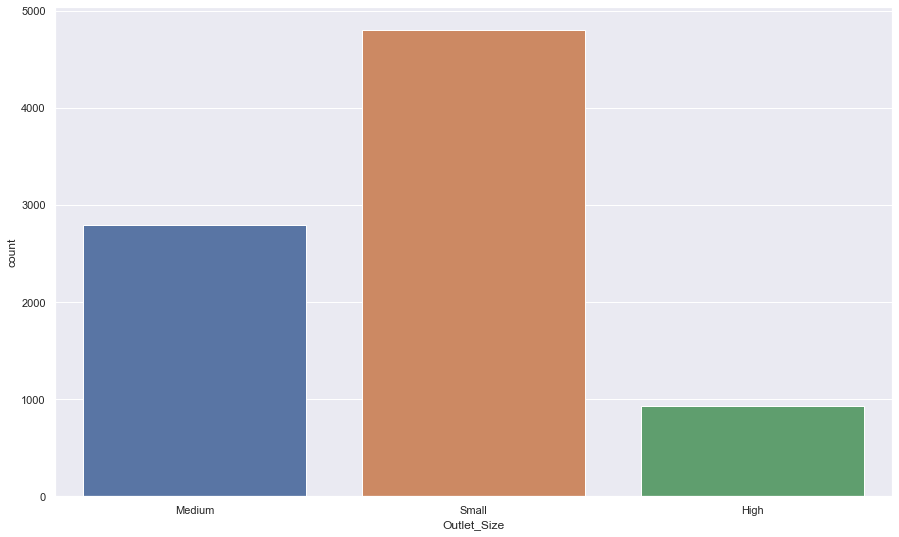

In [24]:
# Let us look at Outlet Size

plt.figure(figsize=(15, 9))
sns.countplot(big_mart_data['Outlet_Size'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


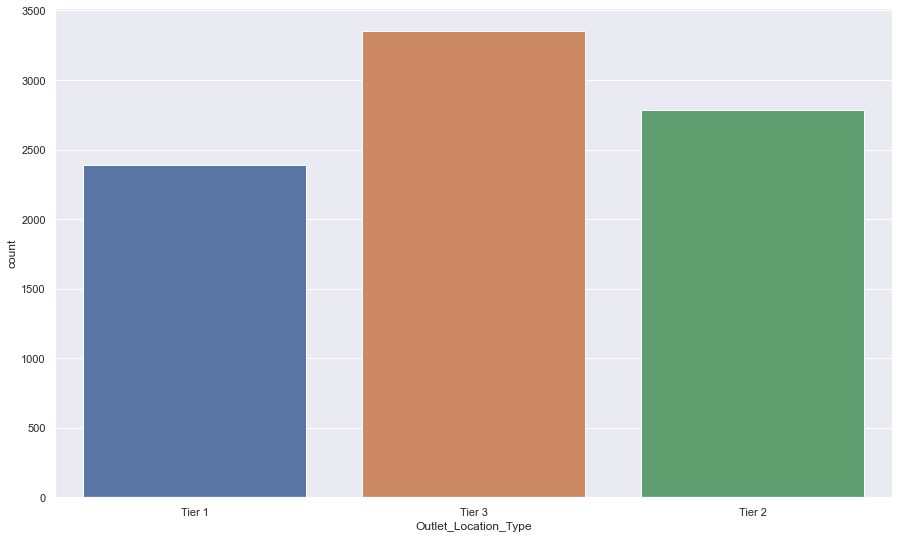

In [25]:
# Let us look at Outlet Location Type

plt.figure(figsize=(15, 9))
sns.countplot(big_mart_data['Outlet_Location_Type'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


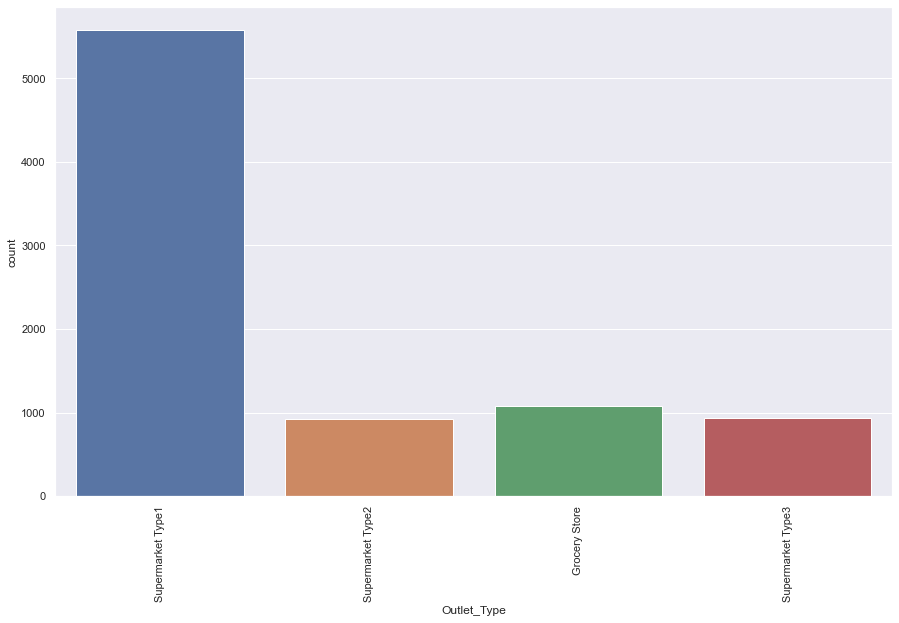

In [26]:
# Let us look at Outlet Type

plt.figure(figsize=(15, 9))
sns.countplot(big_mart_data['Outlet_Type'])
plt.xticks(rotation = 90)
plt.show()

# Data Pre-porcessing:

In [27]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


 We need to convert Categorical values into Numerical values to feed them into Machine Learning Model.

In [28]:
# We can use LabelEncoders for this purpose
# Convert all Catergorical Values into Numerical Values

label_encoder = LabelEncoder()

big_mart_data['Item_Identifier'] = label_encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] =  label_encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = label_encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = label_encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = label_encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = label_encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = label_encoder.fit_transform(big_mart_data['Outlet_Type'])


In [29]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Machine Learning Modeling:

In [31]:
# Spliting data into Features (X) and Target (y)

X = big_mart_data.drop(columns='Item_Outlet_Sales', axis = 1)
y = big_mart_data['Item_Outlet_Sales']

In [35]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [36]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


### Train Test Splitting

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
print(f'The shape of Training data is: {x_train.shape}')
print(f'The shape of Testing data is: {x_test.shape}')

The shape of Training data is: (6818, 11)
The shape of Testing data is: (1705, 11)


### Model Training

In [53]:
# We are using XGBoost Regressor Function

reg = XGBRegressor()

reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
from sklearn.metrics import r2_score

# Evaluation on Training Data
training_data_pred = reg.predict(x_train)
r2_train = r2_score(y_train, training_data_pred)

# Evaluation on Testing Data
training_data_pred = reg.predict(x_test)
r2_test = r2_score(y_test, training_data_pred)

print(f'The value of R2_Score on Training data is: {r2_train}')
print(f'The value of R2_Score on Testing data is: {r2_test}')

The value of R2_Score on Training data is: 0.8639680373364909
The value of R2_Score on Testing data is: 0.5233136709735687
